# GF3: Synchronisation 
### Using gaussian white noise, time domain

In [86]:
#importing necessary libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sounddevice as sd

#### Producing white noise

In [87]:
#parameters
SAMPLE_RATE = 44100  # Sample rate in Hz
DURATION = 5  # Duration of the white noise in seconds
RECORDING_DURATION = 20  # Duration of the recording in seconds

[ 0.10887805 -0.03030706  0.14197112 ... -0.19161545  0.21614725
 -0.41014955]
(220500,)
[[ 0.10887805  0.10887805]
 [-0.03030706 -0.03030706]
 [ 0.14197112  0.14197112]
 ...
 [-0.19161545 -0.19161545]
 [ 0.21614725  0.21614725]
 [-0.41014955 -0.41014955]]


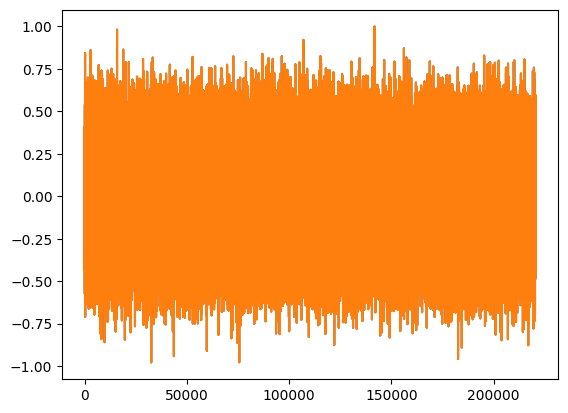

In [88]:
# Generate white noise, array of sample_rate * duration samples
np.random.seed(42)
noise = np.random.normal(0, 1, SAMPLE_RATE * DURATION)

# Normalize the white noise
noise = noise / np.max(np.abs(noise))

noise_2D = np.column_stack((noise, noise))

print(noise)
print(noise.shape)
print(noise_2D)
plt.plot(noise_2D)

In [89]:
#sd.play(noise, SAMPLE_RATE)

In [90]:
#sd.stop()

#### Recording white noise

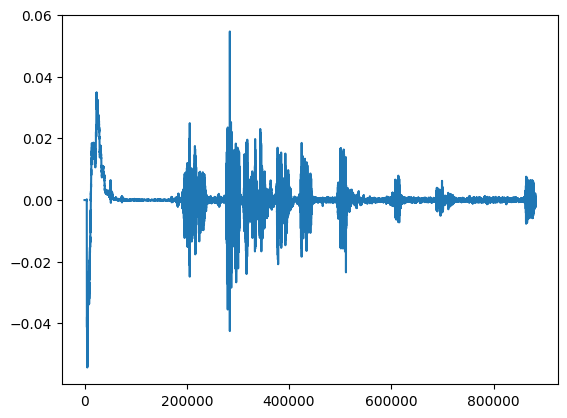

In [95]:
# records the audio, use longer duration than the noise
myrecording = sd.rec(int(RECORDING_DURATION * SAMPLE_RATE), samplerate=SAMPLE_RATE, channels=1)
sd.wait()  # Wait until recording is finished
plt.plot(myrecording)

# # records the audio as it plays
# selfrecording = sd.playrec(noise, SAMPLE_RATE, channels=2) 
# sd.wait()  # Wait until the recording is finished



max value is  39.258940494782415
at index  199656


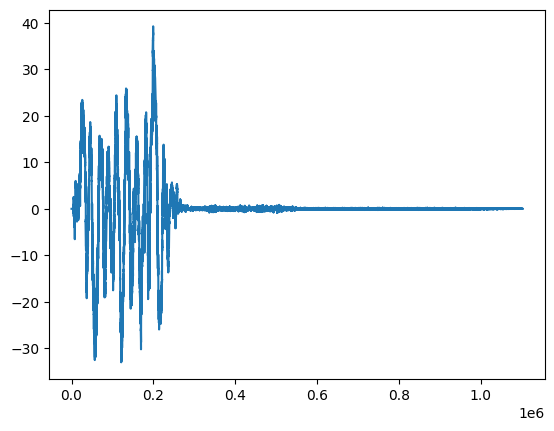

In [92]:
selfrecording_channel1 = selfrecording[:, 0]
noise2D_channel1 = noise_2D[:, 0]
selfrecording_channel2 = selfrecording[:, 1]
noise2D_channel2 = noise_2D[:, 1]
myrecording_channel1 = 20*myrecording[:, 0]



sync = scipy.signal.correlate(myrecording_channel1 ,noise2D_channel1, mode='full', method='auto')
#sync_2 = scipy.signal.correlate(selfrecording_channel2, noise2D_channel2, mode='full', method='auto')
#check the dimensionality of the selfrecording signal 
print("max value is ",np.max(sync))
print ("at index ",np.argmax(sync))

#plot the correlation
plt.plot(sync)
